In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import csv

hist = []
files = ['../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv',
         #'../excel/dados_historicos_alunos_de_EngComputacaoCuritiba regulares.csv'
         ]

# preenche as listas iniciais
for file in files:
    print(file)
    with open(file, 'r') as csvfile:   
        reader = csv.DictReader(csvfile, delimiter=';')
        for row in reader:
            hist.append(row)
print(len(hist))
print(hist)

../excel/dados_historicos_alunos_de_EngComputacaoCuritiba formados.csv
30144
[{'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '1', 'INGRESSO': '12/07/07', 'CODIGO': 'IF68E', 'ANO': '2012', 'NOTA': '8,2', 'CH': '60', 'SITUACAOALUNO': 'Formado'}, {'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '2', 'INGRESSO': '12/07/07', 'CODIGO': 'IF35J', 'ANO': '2007', 'NOTA': '7', 'CH': '60', 'SITUACAOALUNO': 'Formado'}, {'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '2', 'INGRESSO': '12/07/07', 'CODIGO': 'MA33K', 'ANO': '2007', 'NOTA': '0', 'CH': '60', 'SITUACAOALUNO': 'Formado'}, {'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '2', 'INGRESSO': '12/07/07', 'CODIGO': 'F2D070', 'ANO': '2007', 'NOTA': '8,8', 'CH': '75', 'SITUACAOALUNO': 'Formado'}, {'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '2', 'INGRESSO': '12/07/07', 'CODIGO': 'E1D000', 'ANO': '2007', 'NOTA': '0', 'CH': '30', 'SITUACAOALUNO': 'Formado'}, {'ID_ANONIMO': '13236', 'CR': '0,6826', 'PERIODO': '2', 'INGRESSO': '12/07/0

In [2]:
# função para verificar se um aluno teve seu ingresso antes ou depois de 2014
def beforeClasses(date):
    year = date.split('/')[2]
    if (int(year) < 14):
        return True
    return False

In [3]:
# Remove todos os alunos que ingressaram antes de 2014 
for i in range(len(hist)):
    if (i == len(hist)):
        break
    if (beforeClasses(hist[i]['INGRESSO'])):
        hist.pop(i)
        i = 0

# Remove todos dados de reprovações (matérias repetidas)
for i in range(len(hist)):
    for j in range(i, len(hist)):
        if (j == len(hist)):
            break
        if (hist[i]["ID_ANONIMO"] != hist[j]["ID_ANONIMO"]):
            break
        if (j < len(hist) and (i != j and (hist[i]["ID_ANONIMO"] == hist[j]["ID_ANONIMO"] and hist[i]["CODIGO"] == hist[j]["CODIGO"]))):
            hist.pop(j)
            j -= 5
len(hist)

# TODO: caso o aluno tenha reprovado em uma matéria, deve ser removido também. 
# Uma reprovação não conta para o sistema de recomendação

18634

In [4]:
G = nx.Graph()

# Adiciona todos os nós, que são os alunos
# Sem colocar nenhum aluno pré-2014
for line in hist:
    if (not beforeClasses(line['INGRESSO'])):
        if not G.has_node(line["ID_ANONIMO"]):
            G.add_node(line["ID_ANONIMO"])
G.nodes()

NodeView(('90729', '113853', '118844', '123664', '123676', '123677', '123686', '123688', '123736', '129034', '131006', '131014', '136341', '136730', '136731', '136736', '145077', '150873', '150878', '150887', '150892', '151217', '156158', '158257', '159067', '160836', '160839', '160852', '160855', '161216', '161223', '161226', '161228', '165431', '165432', '165685', '165892', '165894', '165895', '166050', '169043', '171740', '171745', '171746', '171749', '171750', '171751', '171754', '171755', '172044', '172045', '172046', '172207', '172208', '172248', '172307', '172974', '175962', '179385', '179393', '179397', '179408', '179624', '179652', '179819', '179822', '179823', '179944', '180984', '182856', '182913', '183413', '183414', '186021', '186024', '186036', '189048', '190493', '190494', '190495', '190499', '190508', '190615', '191284', '198372', '198543', '202261'))

In [5]:
print(G.number_of_nodes())

87


In [6]:
# Verifica quais são as matérias obrigatórias, que não serão levadas em conta
mandatory = []
with open('../texts/obrigatorias.txt', 'r') as f:   
    lines = f.readlines()
    for l in lines:
        mandatory.append(l.replace("\n", ""))

print(mandatory)

['ES61A', 'IF61B', 'IF61C', 'MA61A', 'MA61B', 'FI61A', 'ES70R', 'CSD20', 'CSF13', 'MA71A', 'MA71B', 'FIT1S', 'QB62A', 'IF62C', 'MA62A', 'EL62A', 'FI62A', 'FI63A', 'IF62J', 'QB70C', 'CSE20', 'MA72A', 'EEF11', 'FI71S', 'FI71N', 'FI71M', 'FI72S', 'FI72N', 'FI72M', 'FI73S', 'FI73N', 'FI73M', 'FI74S', 'FI74N', 'FI74M', 'EEX21', 'ES60A', 'MA65A', 'IF63C', 'MA63A', 'MA63B', 'IF63E', 'IF63F', 'EL63B', 'ES70P', 'MA70H', 'CSF20', 'MA73A', 'MA70G', 'CSD21', 'CSH30', 'EEB21', 'EEB22', 'ES60F', 'FI64C', 'IF64C', 'EL65G', 'EL65A', 'EL64O', 'IF64J', 'ES60F', 'FI62B', 'CSF30', 'CSA30', 'EEQ31', 'EEB31', 'EEE31', 'EEX22', 'EEX11', 'ES60G', 'FI66A', 'IF65C', 'IF65D', 'IF65E', 'EL65H', 'IF62F', 'ES70G', 'FI66A', 'CSA31', 'CSG20', 'CSB30', 'EEE32', 'CSW30', 'GE60D', 'IF65C', 'IF66C', 'IF66D', 'EL66G', 'EL66H', 'EL66L', 'IF66J', 'GE70D', 'CSR30', 'CSE30', 'CSO30', 'EEC21', 'EEC31', 'CSW40', 'CSR31', 'EEF21', 'EEX23', 'GE60B', 'IF67B', 'IF67C', 'IF67D', 'EL66D', 'EL68A', 'IF60J', 'GE70D', 'CSR41', 'CSS30', 

In [7]:
# Adiciona as arestas
with open('all_edges.txt', 'w') as f:
    for i in range(len(hist)):
        # o estudante deve estar no grafo
        if G.has_node(hist[i]["ID_ANONIMO"]):
            # a disciplina não pode ser obrigatória
            if (hist[i]["CODIGO"] not in mandatory):
                for j in range(i, len(hist)):
                    # o estudante deve estar no grafo
                    if G.has_node(hist[j]["ID_ANONIMO"]):
                        # a disciplina não pode ser obrigatória
                        if (hist[j]["CODIGO"] not in mandatory):
                            # os alunos deve ser diferentes
                            if (hist[i]["ID_ANONIMO"] != hist[j]["ID_ANONIMO"]):
                                # as matérias devem ser as mesmas
                                if (hist[i]["CODIGO"] == hist[j]["CODIGO"]):
                                    f.write(hist[i]["ID_ANONIMO"] + " - " + hist[j]["ID_ANONIMO"] + " : " + hist[j]["CODIGO"] + "\n")
                                    if (G.has_edge(hist[i]["ID_ANONIMO"], hist[j]["ID_ANONIMO"])):
                                        G[hist[i]["ID_ANONIMO"]][hist[j]["ID_ANONIMO"]]['weight'] += 1
                                    else:
                                        G.add_edge(hist[i]["ID_ANONIMO"], hist[j]["ID_ANONIMO"], weight = 1) 

In [8]:
# Remover as arestas com peso pequeno
edges_remove = []
for u, v, a in G.edges(data=True):
    if a["weight"] < 0:
        edges_remove.append([u, v])
G.remove_edges_from(edges_remove)

In [9]:
print(G.number_of_edges())

2803


In [10]:
# ordena os vértices por grau, para verificar os alunos com maior n de matérias em comum
degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)
with open('node_degree_all.txt', 'w') as f:
    for degree in degrees:
        f.write(str(degree) + "\n")

In [11]:
# Escreve o arquivo gexf para visualização de grafos
nx.write_gexf(G, "grafo_caminho.gexf")

In [12]:
# ordena as arestas por peso, buscando assim quais os estudantes mais relacionadas
edges = sorted(G.edges(data=True), key=lambda edge: edge[2].get('weight', 1))
with open('edge_weights.txt', 'w') as f1:
    for edge in edges:
        f1.write(str(edge) + "\n")


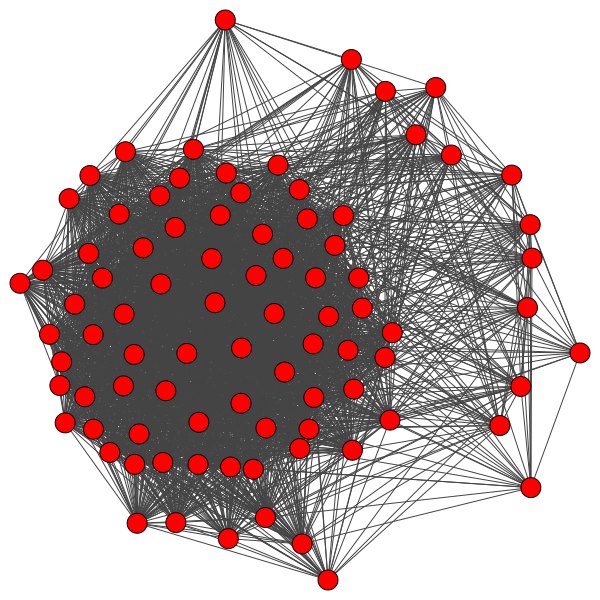

In [15]:
import leidenalg as la
import igraph as ig
# Separa o grafo em comunidades
# O alg usado para isso é o Leinden, com a biblioteca LeidenAlg
# para isso, é preciso transformar o grafo do networkX para Igraph
H = ig.Graph.from_networkx(G)
ig.plot(H)

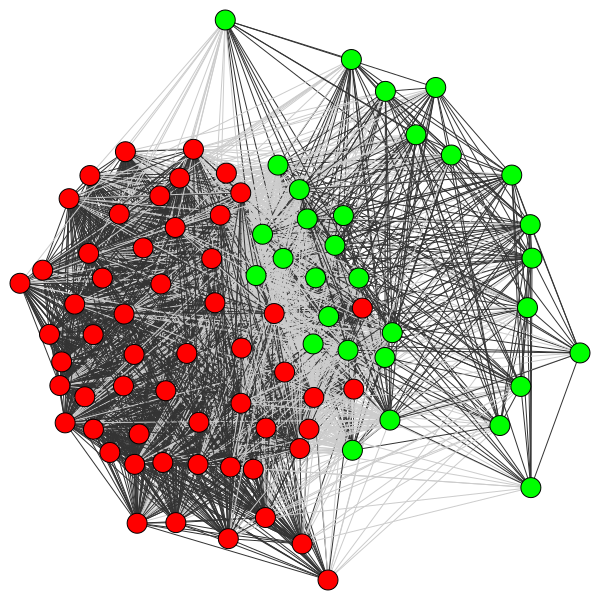

In [16]:
# Agora roda a partição
partition = la.find_partition(H, la.ModularityVertexPartition)
ig.plot(partition)